In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

import networkx as nx

from coppeliasim_zmqremoteapi_client import RemoteAPIClient 

def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])


# def Rz(theta):
  
#     return np.array([[ np.cos(theta), -np.sin(theta) ],
#                       [ np.sin(theta), np.cos(theta)]])

In [ ]:
import os 

print(os.getcwd())

## Processamento de imagem

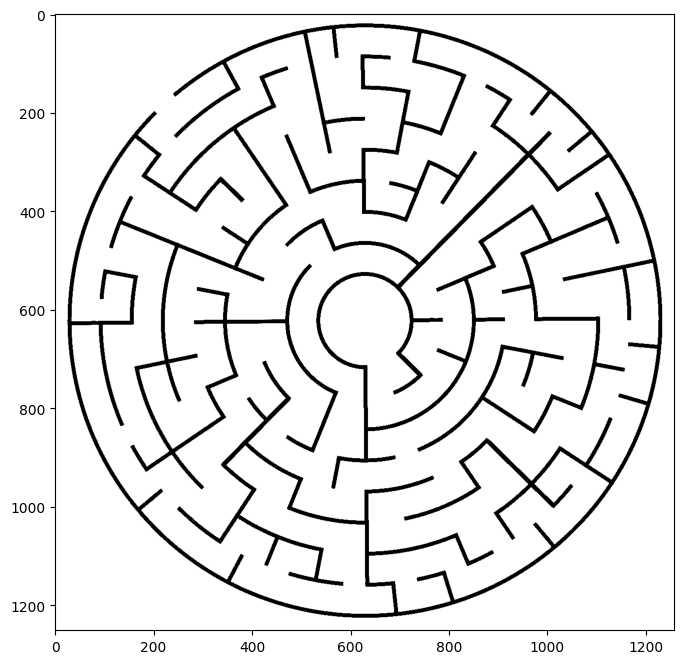

In [51]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Invertendo os valores para visualização (Branco - 0, Preto - 1)
img = mpimg.imread('../mapas_meus/circular_maze.png').astype(float)

if img.ndim == 3:
    img = img[:, :, 0]

img = 1 - img

# Apenas para garantir que só teremos esses dois valores
threshold = 0.5
img[img > threshold] = 1
img[img<= threshold] = 0

ax.imshow(img, cmap='Greys', origin='upper')

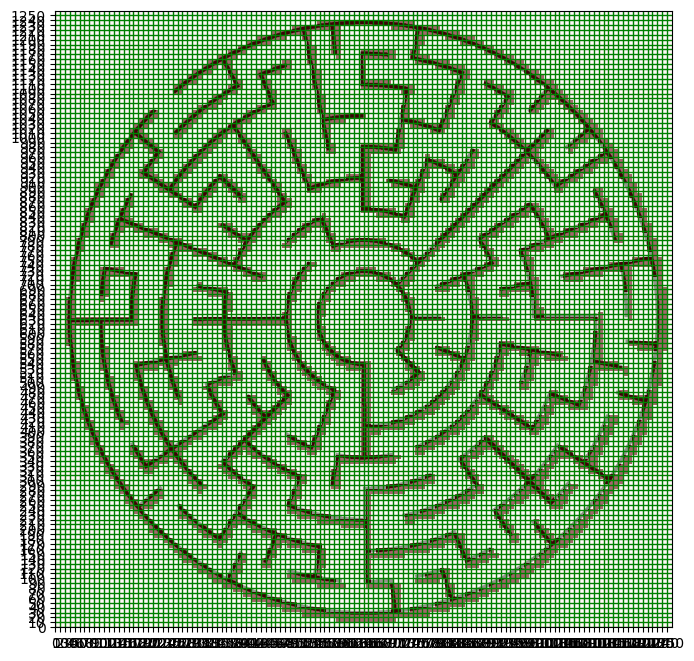

In [52]:
# Dimensões do mapa informado em metros (X, Y)
map_dims = np.array([1258, 1259]) # Cave 

# Escala Pixel/Metro
sy, sx = img.shape[:2] / map_dims

# Tamanho da célula do nosso Grid (em metros)
cell_size = 10

rows, cols = (map_dims / cell_size).astype(int)
grid = np.zeros((rows, cols))

# Preenchendo o Grid
# Cada célula recebe o somatório dos valores dos Pixels
for r in range(rows):
    for c in range(cols):
        
        xi = int(c*cell_size*sx)
        xf = int(xi + cell_size*sx)
        
        yi = int(r*cell_size*sy)
        yf = int(yi + cell_size*sy)
                      
        grid[r, c] = np.sum(img[yi:yf,xi:xf])
        
# Binarizando as células como ocupadas (1) ou Não-ocupadas (0)       
grid[grid > threshold] = 1
grid[grid<= threshold] = 0        

fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Plotando Mapa e Células
obj = ax.imshow(img, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]), origin='upper')
obj = ax.imshow(grid, cmap='Reds', extent=(0, map_dims[1], 0, map_dims[0]), alpha=.6)

# Plotando as linhas do grid para facilitar a visualização
ax.grid(which='major', axis='both', linestyle='-', color='green', linewidth=1)
ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

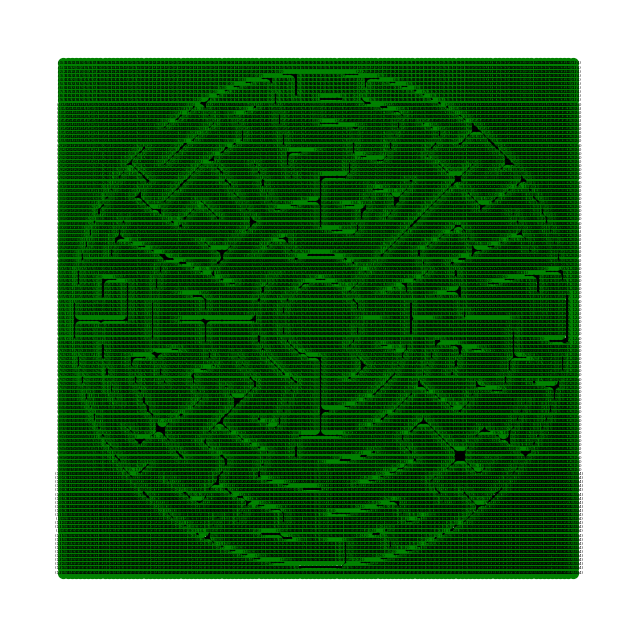

In [54]:
# Criando o Grafo para o nosso Grid

# Criando vértices em todas as células
G = nx.grid_2d_graph(rows, cols) 

# Removendo células que estão em células marcas com obstáculos
for r in range(rows):
    for c in range(cols):
        if grid[r][c] == 1:  
            G.remove_node((r,c))


fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Grid
obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0, map_dims[0]))

ax.grid(which='major', axis='both', linestyle='-', color='r', linewidth=1)
ax.set_xticks(np.arange(0, map_dims[1]+1, cell_size))
ax.set_yticks(np.arange(0, map_dims[0]+1, cell_size))

# Os vértices serão plotados no centro da célula  
pos = {node:(node[1]*cell_size+cell_size/2, map_dims[0]-node[0]*cell_size-cell_size/2) for node in G.nodes()}
nx.draw(G, pos, font_size=3, with_labels=True, node_size=50, node_color="g", ax=ax)

In [55]:
print(G[50,50])

{(49, 50): {}, (51, 50): {}, (50, 49): {}, (50, 51): {}}


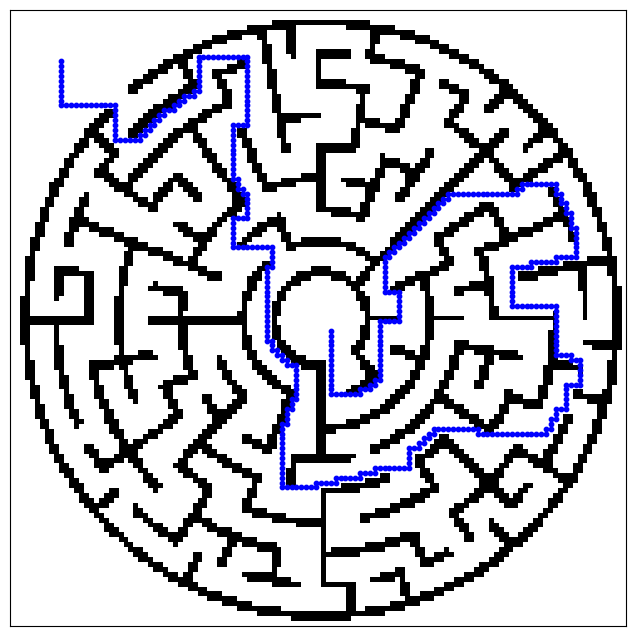

In [61]:
# Finalmente podemos determinar o menor caminho entre duas células
# ATENÇÃO para o Sistema de Coordenadas -- relação Índice do grid e Posição no mundo

start_node =  (65, 65)
end_node = (10, 10)


fig = plt.figure(figsize=(8,8), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Mapa
obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0,map_dims[0]))

# Caminho
path = nx.shortest_path(G, source=start_node, target=end_node)
nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=10, node_color='b')

## teste

In [29]:
def mapa(image_caminho,start_node,end_node,escala_imagem,tamanho_cell):

    fig = plt.figure(figsize=(8,8), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')

    # Invertendo os valores para visualização (Branco - 0, Preto - 1)

    img = mpimg.imread(image_caminho).astype(float)

    if img.ndim == 3:
        img = img[:, :, 0]

    img = 1 - img

    # Apenas para garantir que só teremos esses dois valores
    threshold = 0.5
    img[img > threshold] = 1
    img[img<= threshold] = 0

    # ax.imshow(img, cmap='Greys', origin='upper')

    # Dimensões do mapa informado em metros (X, Y)
    # map_dims = np.array([64, 64]) # Cave 
    map_dims = np.array(escala_imagem)

    # Escala Pixel/Metro
    sy, sx = img.shape[:2] / map_dims

    # Tamanho da célula do nosso Grid (em metros)
    cell_size = tamanho_cell

    rows, cols = (map_dims / cell_size).astype(int)
    grid = np.zeros((rows, cols))

    # Preenchendo o Grid
    # Cada célula recebe o somatório dos valores dos Pixels
    for r in range(rows):
        for c in range(cols):
            
            xi = int(c*cell_size*sx)
            xf = int(xi + cell_size*sx)
            
            yi = int(r*cell_size*sy)
            yf = int(yi + cell_size*sy)
                        
            grid[r, c] = np.sum(img[yi:yf,xi:xf])
            
    # Binarizando as células como ocupadas (1) ou Não-ocupadas (0)       
    grid[grid > threshold] = 1
    grid[grid<= threshold] = 0   

    # Criando o Grafo para o nosso Grid

    # Criando vértices em todas as células
    G = nx.grid_2d_graph(rows, cols) 

    # Removendo células que estão em células marcas com obstáculos
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 1:  
                G.remove_node((r,c))

    # Os vértices serão plotados no centro da célula  
    pos = {node:(node[1]*cell_size+cell_size/2, map_dims[0]-node[0]*cell_size-cell_size/2) for node in G.nodes()}

    # Mapa
    obj = ax.imshow(grid, cmap='Greys', extent=(0, map_dims[1], 0,map_dims[0]))

    # Caminho
    path = nx.shortest_path(G, source=start_node, target=end_node)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=100, node_color='b')

    return pos, path


# mapa('../mapas_meus/teste1_invertido.png',(5,5),(37,37))

# pos, path = mapa('../mapas_meus/teste1_invertido.png',(5,5),(27,57))


## Execução do codigo

In [30]:
def pixel_to_world(x_px, y_px, img_size=65, world_size=10):
    """
    Converte coordenadas de pixel (imagem) para coordenadas do CoppeliaSim (metros).
    """
    scale = world_size / img_size  # m/pixel
    x_world = (x_px - img_size/2) * scale
    y_world = (y_px - img_size/2) * scale 
    return x_world, y_world


In [ ]:
pos, path = mapa('../mapas_meus/maze_circula_invertido.png',(5,5),(57,47))

NodeNotFound: Source (65, 65) is not in G

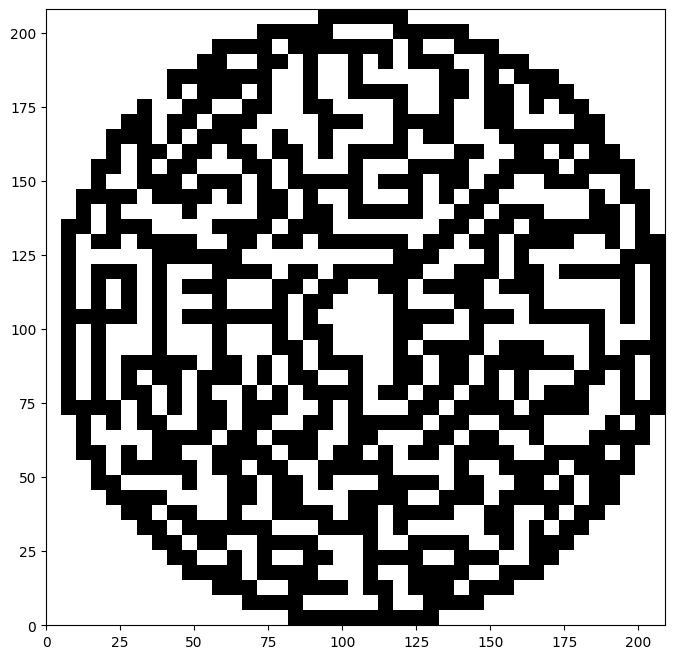

In [37]:
pos, path = mapa('../mapas_meus/mapa_convertido.png',(65, 65),(0,0),(208,209),5)
# pos, path = mapa('../mapas_meus/circular_maze.png',(65, 65),(0,0),(1250,1250),5)

In [69]:
# pos, path = mapa('../mapas_meus/mapa_convertido.png',(65, 65),(0,0),(209,208),5)

# Informacao do robotino
L = 0.135  # distancia do centro as rodas (m)
r = 0.040  # raio das rodas (m)


# pos_world = {node: pixel_to_world(x_px, y_px, 64, 10) for node, (x_px, y_px) in pos.items()}
pos_world = {node: pixel_to_world(x_px, y_px, 1259, 20) for node, (x_px, y_px) in pos.items()}
# Cinematica Inversa Holonomico
Minv =  np.array([
    [-(np.sqrt(3)/2),    1/2   ,    L],
    [      0      ,    -1    ,    L],
    [(np.sqrt(3)/2),    1/2   ,    L]
    ]) * (1 / r)


# Posicao inicial do robo - o mesmo da caminho
start_node = path[0]
start_pos_world = pos_world[start_node]
start_pos_sim = [start_pos_world[0], start_pos_world[1], 0.04]
start_ori_sim = [0, 0, np.deg2rad(90)]


# Conexao Coppelia
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

robotname = 'robotino'
robotHandle = sim.getObject(f'/{robotname}')

wheel1 = sim.getObject(f'/{robotname}/wheel0_joint')
wheel2 = sim.getObject(f'/{robotname}/wheel1_joint')
wheel3 = sim.getObject(f'/{robotname}/wheel2_joint')


# Parar a simulação se estiver executando
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

sim.startSimulation()
sim.setObjectPosition(robotHandle, sim.handle_world, start_pos_sim)
sim.setObjectOrientation(robotHandle, sim.handle_world, start_ori_sim)
sim.step()

# Estado inicial
q = np.array([start_pos_sim[0], start_pos_sim[1], start_ori_sim[2]])

print("Iniciando o caminho")

# Caminhos a ser seguidos
waypoints = [pos_world[node] for node in path]
target_index = 0
tolerance = 0.2

while target_index < len(waypoints):
    target = np.array(waypoints[target_index])
    pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
    q[:2] = pos_sim[:2]

    # Erro no referencial do mundo
    erro = target - q[:2]
    dist = np.linalg.norm(erro)

    # Controlador proporcional
    vx_world = 0.7 * erro[0]
    vy_world = 0.7 * erro[1]

    # Limita velocidades
    vx_world = np.clip(vx_world, -0.3, 0.3)
    vy_world = np.clip(vy_world, -0.3, 0.3)

    # Converte velocidade do mundo → corpo (mantendo orientação fixa)
    v_body = Rz(-start_ori_sim[2]) @ np.array([vx_world, vy_world, 0.04])


    # vz_body e descartado por ser 0
    vx_body, vy_body , vz_body = v_body
    w = 0.0  # sem rotação

    # Calcula velocidades das rodas
    qdot = np.array([vx_body, vy_body, w])

    
    u = Minv @ qdot  # usa cinemática inversa para gerar rodas

    # Envia velocidades
    sim.setJointTargetVelocity(wheel1, u[0])
    sim.setJointTargetVelocity(wheel2, u[1])
    sim.setJointTargetVelocity(wheel3, u[2])

    # Avança um passo
    sim.step()

    # Verifica se chegou
    if dist < tolerance:
        print(f"Chegou em {path[target_index]} -> indo para o próximo ponto")
        target_index += 1


print("Caminho concluído! Parando robô...")
for w in [wheel1, wheel2, wheel3]:
    sim.setJointTargetVelocity(w, 0)

pos_final = sim.getObjectPosition(robotHandle, sim.handle_world)
print("Posição final (SIM):", pos_final)
sim.stopSimulation()
print("Program ended.")


Iniciando o caminho
Chegou em (65, 65) -> indo para o próximo ponto
Chegou em (66, 65) -> indo para o próximo ponto
Chegou em (67, 65) -> indo para o próximo ponto
Chegou em (68, 65) -> indo para o próximo ponto
Chegou em (69, 65) -> indo para o próximo ponto
Chegou em (70, 65) -> indo para o próximo ponto
Chegou em (71, 65) -> indo para o próximo ponto
Chegou em (72, 65) -> indo para o próximo ponto
Chegou em (73, 65) -> indo para o próximo ponto
Chegou em (74, 65) -> indo para o próximo ponto
Chegou em (75, 65) -> indo para o próximo ponto
Chegou em (76, 65) -> indo para o próximo ponto
Chegou em (77, 65) -> indo para o próximo ponto
Chegou em (78, 65) -> indo para o próximo ponto
Chegou em (78, 66) -> indo para o próximo ponto
Chegou em (78, 67) -> indo para o próximo ponto
Chegou em (78, 68) -> indo para o próximo ponto
Chegou em (78, 69) -> indo para o próximo ponto
Chegou em (78, 70) -> indo para o próximo ponto
Chegou em (78, 71) -> indo para o próximo ponto
Chegou em (77, 71) -

KeyboardInterrupt: 

In [ ]:
# Cinemática direta Holonomico
# Mdir = np.array([
#     [-(r/ np.sqrt(3)),    0     ,    r/np.sqrt(3)],
#     [      r/3     ,  -((2*r)/3)  ,       r/3      ],
#     [     (r/(3*L))    ,  (r/(3*L))   ,       (r/(3*L))    
#     ]])

In [ ]:
# Connect to the CoppeliaSim server
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

# Handle para o ROBÔ
robotname = 'robotino'
robotHandle = sim.getObject('/' + robotname)


pos_world = {}
for node, (x_px, y_px) in pos.items():
    pos_world[node] = pixel_to_world(x_px, y_px, img_size=64, world_size=10)



start_pos = pixel_to_world(5, 5)
start_pos = [start_pos[0],start_pos[1],0.04]

# Orientação inicial (em radianos)
# [roll, pitch, yaw]
start_ori = [0, 0, np.deg2rad(90)]

# Aplicar no simulador
sim.setObjectPosition(robotHandle, sim.handle_world, start_pos)
# sim.setObjectOrientation(robotHandle, sim.handle_world, start_ori)



# Handle para as juntas das RODAS
wheel1 = sim.getObject('/' + robotname + '/wheel0_joint')
wheel2 = sim.getObject('/' + robotname + '/wheel1_joint')
wheel3 = sim.getObject('/' + robotname + '/wheel2_joint')

# Dados Robotino
L = 0.135   # Metros
r = 0.040   # Metros
           
# Cinemática Direta
Mdir = np.array([[-r/np.sqrt(3),     0,        r/np.sqrt(3)], 
                 [r/3,            (-2*r)/3,    r/3], 
                 [r/(3*L),         r/(3*L),    r/(3*L)]])


# Configuração inicial (x, y, w)
q = np.array([0, 0, 0.5])

# # Lembrar de habilitar o 'Real-time mode'    
# # Parar a simulação se estiver executando
# initial_sim_state = sim.getSimulationState()
# if initial_sim_state != 0:
#     sim.stopSimulation()
#     time.sleep(1)

# # Inicia a simulação
# sim.startSimulation()
# sim.step()

# print("Starting robot path-following...")

# # Converter o caminho (lista de nós) em posições no mundo
# waypoints = [pos_world[node] for node in path]

# # Obter posição inicial real no simulador
# pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
# q = np.array([pos_sim[0], pos_sim[1], 0])  # x, y, yaw inicial (yaw = 0 por simplicidade)

# target_index = 0
# tolerance = 0.1  # tolerância em metros para considerar que chegou



# 1. Definir o ponto de partida a partir do PRIMEIRO nó do caminho
start_node = path[0]
start_pos_world = pos_world[start_node]

# Posição inicial (x, y, z)
# O Z=0.04 é a altura do seu robô, mantenha-o.
start_pos_sim = [start_pos_world[0], start_pos_world[1], 0.04]

# Orientação inicial (roll, pitch, yaw) em radianos
# Yaw (rotação em Z) de 90 graus para começar virado para "cima" no mapa, por exemplo.
start_ori_sim = [0, 0, np.deg2rad(90)] 

# Para a simulação se estiver rodando, garantindo um reinício limpo
if sim.getSimulationState() != sim.simulation_stopped:
    sim.stopSimulation()
    # Espera a simulação parar completamente
    while sim.getSimulationState() != sim.simulation_stopped:
        time.sleep(0.1)

# Inicia a simulação
sim.startSimulation()

# 2. Aplicar a posição E a orientação no robô no simulador
print(f"Definindo posição inicial do robô em: {start_pos_sim}")
sim.setObjectPosition(robotHandle, sim.handle_world, start_pos_sim)
print(f"Definindo orientação inicial do robô em (rad): {start_ori_sim}")
sim.setObjectOrientation(robotHandle, sim.handle_world, start_ori_sim)

# Avança um passo na simulação para que as mudanças tenham efeito
sim.step()

# 3. Inicializar o vetor de estado do controlador (q) COM OS MESMOS VALORES
#    Agora 'q' reflete exatamente a pose inicial do robô no mundo.
q = np.array([start_pos_sim[0], start_pos_sim[1], start_ori_sim[2]])

print("Iniciando o seguimento do caminho...")

# Converter o caminho (lista de nós) em posições no mundo
waypoints = [pos_world[node] for node in path]

target_index = 0
tolerance = 0.1  # Tolerância em metros para considerar que chegou




while target_index < len(waypoints):
    target = np.array(waypoints[target_index])
    pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
    q[:2] = pos_sim[:2]
    
    # calcular erro
    erro = target - q[:2]
    dist = np.linalg.norm(erro)
    
    # calcular ângulo para o alvo
    angulo_desejado = np.arctan2(erro[1], erro[0])
    erro_angulo = angulo_desejado - q[2]
    erro_angulo = np.arctan2(np.sin(erro_angulo), np.cos(erro_angulo))  # normalizar

    # controlador simples P
    v_linear = 0.4 * dist
    v_angular = 1.5 * erro_angulo

    # limitar velocidades
    v_linear = np.clip(v_linear, -0.3, 0.3)
    v_angular = np.clip(v_angular, -1.0, 1.0)

    # cinemática inversa
    qdot = np.array([v_linear * np.cos(q[2]), v_linear * np.sin(q[2]), v_angular])
    Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
    u = Minv @ qdot

    # enviar velocidades
    sim.setJointTargetVelocity(wheel1, u[0])
    sim.setJointTargetVelocity(wheel2, u[1])
    sim.setJointTargetVelocity(wheel3, u[2]) 
    
    # atualizar posição
    dt = sim.getSimulationTimeStep()
    q = q + (Rz(q[2]) @ Mdir @ u)*dt
    sim.step()
    
    if dist < tolerance:
        print(f"✅ Chegou em {path[target_index]} -> indo para o próximo ponto")
        target_index += 1

# parar o robô
sim.setJointTargetVelocity(wheel1, 0)
sim.setJointTargetVelocity(wheel2, 0)
sim.setJointTargetVelocity(wheel3, 0)
print("🎯 Caminho concluído!")

sim.stopSimulation()
print('Program ended')

print("Stopping robot...")
sim.setJointTargetVelocity(wheel1, 0)
sim.setJointTargetVelocity(wheel2, 0)
sim.setJointTargetVelocity(wheel3, 0)

# print('CALC Pos: ', sim_time, q[:2], np.rad2deg(q[2]))
  
pos = sim.getObjectPosition(robotHandle, sim.handle_world)
print('SIM Pos: ', pos)
ori = sim.getObjectOrientation(robotHandle, sim.handle_world)
print('SIM Ori: ', np.rad2deg(ori))
    
    
# Parando a simulação
sim.stopSimulation()

print('Program ended')

In [ ]:
import numpy as np
import time
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# ============================================================
# Conversão de coordenadas
# ============================================================
def pixel_to_world(x_px, y_px, img_size=64, world_size=10):
    scale = world_size / img_size  # m/pixel
    x_world = (x_px - img_size / 2) * scale
    y_world = (y_px - img_size / 2) * scale
    return x_world, y_world


def Rz(theta):
    """Matriz de rotação 2D (para converter mundo ↔ corpo)."""
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])


# ============================================================
# Conexão com o CoppeliaSim
# ============================================================
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

# Handle do robô
robotname = 'robotino'
robotHandle = sim.getObject(f'/{robotname}')

# ============================================================
# Conversão das posições dos nós para coordenadas do mundo
# ============================================================
pos_world = {node: pixel_to_world(x_px, y_px, 64, 10) for node, (x_px, y_px) in pos.items()}

# ============================================================
# Dados do robô
# ============================================================
L = 0.135  # distância do centro às rodas (m)
r = 0.040  # raio das rodas (m)

# Cinemática direta do Robotino (holonômico de 3 rodas)
Mdir = np.array([
    [-np.sin(np.deg2rad(0)),    np.cos(np.deg2rad(0)),    L],
    [-np.sin(np.deg2rad(120)),  np.cos(np.deg2rad(120)),  L],
    [-np.sin(np.deg2rad(240)),  np.cos(np.deg2rad(240)),  L]
]) * (1 / r)

# Inversa da cinemática direta
Minv = np.linalg.pinv(Mdir)

# ============================================================
# Handles das juntas das rodas
# ============================================================
wheel1 = sim.getObject(f'/{robotname}/wheel0_joint')
wheel2 = sim.getObject(f'/{robotname}/wheel1_joint')
wheel3 = sim.getObject(f'/{robotname}/wheel2_joint')

# ============================================================
# Configuração inicial
# ============================================================
start_node = path[0]
start_pos_world = pos_world[start_node]
start_pos_sim = [start_pos_world[0], start_pos_world[1], 0.04]
start_ori_sim = [0, 0, np.deg2rad(90)]  # orientação fixa

# Reinicia simulação
if sim.getSimulationState() != sim.simulation_stopped:
    sim.stopSimulation()
    while sim.getSimulationState() != sim.simulation_stopped:
        time.sleep(0.1)

sim.startSimulation()
sim.setObjectPosition(robotHandle, sim.handle_world, start_pos_sim)
sim.setObjectOrientation(robotHandle, sim.handle_world, start_ori_sim)
sim.step()

# Estado inicial
yaw = start_ori_sim[2]
q = np.array([start_pos_sim[0], start_pos_sim[1], yaw])

print("Iniciando o seguimento de caminho (modo holonômico sem rotação)...")

# ============================================================
# Seguimento do caminho
# ============================================================
waypoints = [pos_world[node] for node in path]
target_index = 0
tolerance = 0.1

while target_index < len(waypoints):
    target = np.array(waypoints[target_index])
    pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
    q[:2] = pos_sim[:2]

    # Erro no referencial do mundo
    erro = target - q[:2]
    dist = np.linalg.norm(erro)

    # Controlador proporcional
    vx_world = 0.6 * erro[0]
    vy_world = 0.6 * erro[1]

    # Limita velocidades
    vx_world = np.clip(vx_world, -0.3, 0.3)
    vy_world = np.clip(vy_world, -0.3, 0.3)

    # Converte velocidade do mundo → corpo (mantendo orientação fixa)
    v_body = Rz(-yaw) @ np.array([vx_world, vy_world])
    vx_body, vy_body = v_body
    w = 0.0  # sem rotação

    # Calcula velocidades das rodas
    qdot = np.array([vx_body, vy_body, w])
    u = Mdir @ qdot  # usa cinemática direta para gerar rodas

    # Envia velocidades
    sim.setJointTargetVelocity(wheel1, u[0])
    sim.setJointTargetVelocity(wheel2, u[1])
    sim.setJointTargetVelocity(wheel3, u[2])

    # Avança um passo
    sim.step()

    # Verifica se chegou
    if dist < tolerance:
        print(f"✅ Chegou em {path[target_index]} -> indo para o próximo ponto")
        target_index += 1

# ============================================================
# Encerramento
# ============================================================
print("🎯 Caminho concluído! Parando robô...")
for w in [wheel1, wheel2, wheel3]:
    sim.setJointTargetVelocity(w, 0)

pos = sim.getObjectPosition(robotHandle, sim.handle_world)
print("Posição final (SIM):", pos)
sim.stopSimulation()
print("Program ended.")


In [ ]:
import numpy as np
import time
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# ============================================================
# Conversão de coordenadas
# ============================================================
def pixel_to_world(x_px, y_px, img_size=64, world_size=10):
    scale = world_size / img_size  # m/pixel
    x_world = (x_px - img_size / 2) * scale
    y_world = (y_px - img_size / 2) * scale
    return x_world, y_world


def Rz(theta):
    """Matriz de rotação 2D (para converter mundo ↔ corpo)."""
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])


# ============================================================
# Conexão com o CoppeliaSim
# ============================================================
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

# Handle do robô
robotname = 'robotino'
robotHandle = sim.getObject(f'/{robotname}')

# ============================================================
# Conversão das posições dos nós para coordenadas do mundo
# ============================================================
pos_world = {node: pixel_to_world(x_px, y_px, 64, 10) for node, (x_px, y_px) in pos.items()}

# ============================================================
# Dados do robô
# ============================================================
L = 0.135  # distância do centro às rodas (m)
r = 0.040  # raio das rodas (m)

# Cinemática direta do Robotino (holonômico de 3 rodas)
Mdir = np.array([
    [-np.sin(np.deg2rad(0)),    np.cos(np.deg2rad(0)),    L],
    [-np.sin(np.deg2rad(120)),  np.cos(np.deg2rad(120)),  L],
    [-np.sin(np.deg2rad(240)),  np.cos(np.deg2rad(240)),  L]
]) * (1 / r)

# Inversa da cinemática direta
Minv = np.linalg.pinv(Mdir)

# ============================================================
# Handles das juntas das rodas
# ============================================================
wheel1 = sim.getObject(f'/{robotname}/wheel0_joint')
wheel2 = sim.getObject(f'/{robotname}/wheel1_joint')
wheel3 = sim.getObject(f'/{robotname}/wheel2_joint')

# ============================================================
# Configuração inicial
# ============================================================
start_node = path[0]
start_pos_world = pos_world[start_node]
start_pos_sim = [start_pos_world[0], start_pos_world[1], 0.04]
start_ori_sim = [0, 0, np.deg2rad(90)]  # orientação fixa

# Reinicia simulação
if sim.getSimulationState() != sim.simulation_stopped:
    sim.stopSimulation()
    while sim.getSimulationState() != sim.simulation_stopped:
        time.sleep(0.1)

sim.startSimulation()
sim.setObjectPosition(robotHandle, sim.handle_world, start_pos_sim)
sim.setObjectOrientation(robotHandle, sim.handle_world, start_ori_sim)
sim.step()

# Estado inicial
yaw = start_ori_sim[2]
q = np.array([start_pos_sim[0], start_pos_sim[1], yaw])

print("Iniciando o seguimento de caminho (modo holonômico sem rotação)...")

# ============================================================
# Seguimento do caminho
# ============================================================
waypoints = [pos_world[node] for node in path]
target_index = 0
tolerance = 0.2

while target_index < len(waypoints):
    target = np.array(waypoints[target_index])
    pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
    q[:2] = pos_sim[:2]

    # Erro no referencial do mundo
    erro = target - q[:2]
    dist = np.linalg.norm(erro)

    # Controlador proporcional
    vx_world = 0.6 * erro[0]
    vy_world = 0.6 * erro[1]

    # Limita velocidades
    vx_world = np.clip(vx_world, -0.3, 0.3)
    vy_world = np.clip(vy_world, -0.3, 0.3)

    # Converte velocidade do mundo → corpo (mantendo orientação fixa)
    v_body = Rz(-yaw) @ np.array([vx_world, vy_world])
    vx_body, vy_body = v_body
    w = 0.0  # sem rotação

    # Calcula velocidades das rodas
    qdot = np.array([vx_body, vy_body, w])
    u = Mdir @ qdot  # usa cinemática direta para gerar rodas

    # Envia velocidades
    sim.setJointTargetVelocity(wheel1, u[0])
    sim.setJointTargetVelocity(wheel2, u[1])
    sim.setJointTargetVelocity(wheel3, u[2])

    # Avança um passo
    sim.step()

    # Verifica se chegou
    if dist < tolerance:
        print(f"✅ Chegou em {path[target_index]} -> indo para o próximo ponto")
        target_index += 1

# ============================================================
# Encerramento
# ============================================================
print("🎯 Caminho concluído! Parando robô...")
for w in [wheel1, wheel2, wheel3]:
    sim.setJointTargetVelocity(w, 0)

pos = sim.getObjectPosition(robotHandle, sim.handle_world)
print("Posição final (SIM):", pos)
sim.stopSimulation()
print("Program ended.")


In [ ]:

# Connect to the CoppeliaSim server
client = RemoteAPIClient()
sim = client.require("sim")
sim.setStepping(True)

# Handle para o ROBÔ
robotname = 'robotino'
robotHandle = sim.getObject('/' + robotname)


# Coordenadas desejadas no mundo [x, y, z]
start_pos = [-3, 4, 0.04]  # em metros

# Orientação inicial (em radianos)
# [roll, pitch, yaw]
start_ori = [0, 0, np.deg2rad(90)]

# Aplicar no simulador
sim.setObjectPosition(robotHandle, sim.handle_world, start_pos)
# sim.setObjectOrientation(robotHandle, sim.handle_world, start_ori)



# Handle para as juntas das RODAS
wheel1 = sim.getObject('/' + robotname + '/wheel0_joint')
wheel2 = sim.getObject('/' + robotname + '/wheel1_joint')
wheel3 = sim.getObject('/' + robotname + '/wheel2_joint')

# Dados Robotino
L = 0.135   # Metros
r = 0.040   # Metros
           
# Cinemática Direta
Mdir = np.array([[-r/np.sqrt(3),     0,        r/np.sqrt(3)], 
                 [r/3,            (-2*r)/3,    r/3], 
                 [r/(3*L),         r/(3*L),    r/(3*L)]])


# Configuração inicial (x, y, w)
q = np.array([0, 0, 0.5])

# Lembrar de habilitar o 'Real-time mode'    
# Parar a simulação se estiver executando
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

# Inicia a simulação
sim.startSimulation()
sim.step()




# --- após iniciar a simulação ---
print("Starting robot path-following...")

# Transformar o caminho (lista de nós) em lista de coordenadas
waypoints = [pos[node] for node in path]

# posição inicial no simulador
pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
q = np.array([pos_sim[0], pos_sim[1], 0])  # x, y, yaw inicial

target_index = 0
tolerance = 0.1  # erro de posição aceitável (m)

while target_index < len(waypoints):
    target = np.array(waypoints[target_index])
    pos_sim = sim.getObjectPosition(robotHandle, sim.handle_world)
    q[:2] = pos_sim[:2]
    
    # calcular erro
    erro = target - q[:2]
    dist = np.linalg.norm(erro)
    
    # calcular ângulo para o alvo
    angulo_desejado = np.arctan2(erro[1], erro[0])
    erro_angulo = angulo_desejado - q[2]
    
    # normalizar ângulo para [-pi, pi]
    erro_angulo = np.arctan2(np.sin(erro_angulo), np.cos(erro_angulo))
    
    # velocidades proporcionais simples
    v_linear = 0.3 * dist
    v_angular = 1.5 * erro_angulo
    
    # limitar velocidades
    v_linear = np.clip(v_linear, -0.3, 0.3)
    v_angular = np.clip(v_angular, -1.0, 1.0)
    
    # cinemática inversa
    qdot = np.array([v_linear * np.cos(q[2]), v_linear * np.sin(q[2]), v_angular])
    Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
    u = Minv @ qdot

    # aplicar velocidades
    sim.setJointTargetVelocity(wheel1, u[0])
    sim.setJointTargetVelocity(wheel2, u[1])
    sim.setJointTargetVelocity(wheel3, u[2]) 
    
    # atualizar estado
    dt = sim.getSimulationTimeStep()
    q = q + (Rz(q[2]) @ Mdir @ u)*dt
    sim.step()
    
    # quando chegar no ponto alvo, mudar para o próximo
    if dist < tolerance:
        print(f"✅ Chegou em {path[target_index]} -> indo para o próximo")
        target_index += 1

# parar ao final
sim.setJointTargetVelocity(wheel1, 0)
sim.setJointTargetVelocity(wheel2, 0)
sim.setJointTargetVelocity(wheel3, 0)
print("🎯 Caminho concluído!")

sim.stopSimulation()


In [ ]:
try:
    # Connect to the CoppeliaSim server
    client = RemoteAPIClient()
    sim = client.require("sim")
    sim.setStepping(True)

    # Handle para o ROBÔ
    robotname = 'robotino'
    robotHandle = sim.getObject('/' + robotname)
    
    # Handle para as juntas das RODAS
    wheel1 = sim.getObject('/' + robotname + '/wheel0_joint')
    wheel2 = sim.getObject('/' + robotname + '/wheel1_joint')
    wheel3 = sim.getObject('/' + robotname + '/wheel2_joint')
              
    # Dados Robotino
    L = 0.135   # Metros
    r = 0.040   # Metros  
    
    # Cinemática Direta
    Mdir = np.array([[-r/np.sqrt(3), 0, r/np.sqrt(3)], [r/3, (-2*r)/3, r/3], [r/(3*L), r/(3*L), r/(3*L)]])
           
    # Goal configuration (x, y, theta)    
    qgoal = np.array([3, 3, np.deg2rad(90)])
    #qgoal = np.array([3, -3, np.deg2rad(-90)])
    #qgoal = np.array([0, 0, np.deg2rad(0)])
    
    # Lembrar de habilitar o 'Real-time mode'    
    # Parar a simulação se estiver executando
    initial_sim_state = sim.getSimulationState()
    if initial_sim_state != 0:
        sim.stopSimulation()
        time.sleep(1)
    
    # Inicia a simulação
    sim.startSimulation()
    sim.step()

    # Frame que representa o Goal
    goalFrame = sim.getObject('/Goal')
    sim.setObjectPosition(goalFrame, [qgoal[0], qgoal[1], 0], sim.handle_world)
    sim.setObjectOrientation(goalFrame, [0, 0, qgoal[2]], sim.handle_world)
    
    gain = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])
    #gain = np.array([[0.3, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])
    
    print("Starting robot control loop...")
    while (sim_time := sim.getSimulationTime()) <= 90:
        print(f"Simulation time: {sim_time:.2f} [s]")
        
        dt = sim.getSimulationTimeStep()
                
        pos = sim.getObjectPosition(robotHandle, sim.handle_world)
        ori = sim.getObjectOrientation(robotHandle, sim.handle_world)

        q = np.array([pos[0], pos[1], ori[2]])
        
        error = qgoal - q
        print(f"Error: {np.linalg.norm(error[:2])}")
        
        # Margem aceitável de distância
        if (np.linalg.norm(error[:2]) < 0.05):
            break

        # Controller
        qdot = gain @ error
        
        # Cinemática Inversa
        # w1, w2, w3
        Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
        u = Minv @ qdot
        
        # Enviando velocidades
        sim.setJointTargetVelocity(wheel1, u[0])
        sim.setJointTargetVelocity(wheel2, u[1])
        sim.setJointTargetVelocity(wheel3, u[2]) 
                
        sim.step()

    # Parando o robô
    print("Stopping robot...")
    sim.setJointTargetVelocity(wheel1, 0)
    sim.setJointTargetVelocity(wheel2, 0)
    sim.setJointTargetVelocity(wheel3, 0)
    
except Exception as e:
    print(f"An error occurred: {e}")
    
# Parando a simulação
sim.stopSimulation()

print('Program ended')